# K- Means Clustering

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir(r'F:\MODULE 3\py-master\py-master\ML\13_kmeans')
os.listdir()

['13_kmeans_tutorial.ipynb', 'Exercise', 'income.csv', 'iris.png']

In [5]:
df=pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [7]:
sns.set_theme()

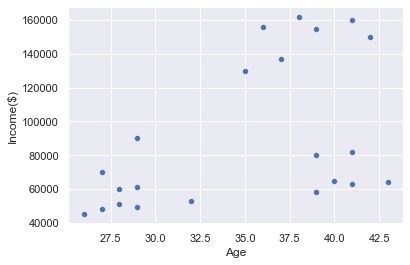

In [9]:
sns.scatterplot(data=df,x='Age',y='Income($)');

In [15]:
import sklearn
dir(sklearn.cluster)

['AffinityPropagation',
 'AgglomerativeClustering',
 'Birch',
 'DBSCAN',
 'FeatureAgglomeration',
 'KMeans',
 'MeanShift',
 'MiniBatchKMeans',
 'OPTICS',
 'SpectralBiclustering',
 'SpectralClustering',
 'SpectralCoclustering',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_affinity_propagation',
 '_agglomerative',
 '_bicluster',
 '_birch',
 '_dbscan',
 '_dbscan_inner',
 '_feature_agglomeration',
 '_hierarchical_fast',
 '_k_means_elkan',
 '_k_means_fast',
 '_k_means_lloyd',
 '_kmeans',
 '_mean_shift',
 '_optics',
 '_spectral',
 'affinity_propagation',
 'cluster_optics_dbscan',
 'cluster_optics_xi',
 'compute_optics_graph',
 'dbscan',
 'estimate_bandwidth',
 'get_bin_seeds',
 'k_means',
 'kmeans_plusplus',
 'linkage_tree',
 'mean_shift',
 'spectral_clustering',
 'ward_tree']

In [17]:
from sklearn.cluster import KMeans

In [109]:
km_model=KMeans(n_clusters=4)

In [110]:
y_pred=km_model.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [111]:
df['cluster']=y_pred

In [112]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,3


In [106]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_isotonic',
 '_loss',
 'base',
 'clone',
 'cluster',
 'config_context',
 'decomposition',
 'exceptions',
 'get_config',
 'isotonic',
 'linear_model',
 'logger',
 'logging',
 'manifold',
 'metrics',
 'model_selection',
 'neighbors',
 'os',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'tree',
 'utils']

In [113]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]

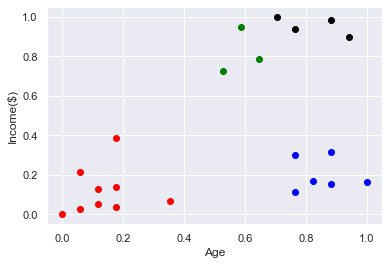

In [115]:
sns.scatterplot(data=df,x='Age',y='Income($)');
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(df4.Age,df4['Income($)'],color='black');

# Scaling down using MinMaxScale

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler=MinMaxScaler()

In [72]:
df['Income($)']= scaler.fit_transform(df[['Income($)']])

In [73]:
df['Age']=scaler.fit_transform(df[['Age']])

In [74]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [75]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [76]:
df['cluster']=y_predicted

In [77]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


## Cluster Centroids

In [78]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

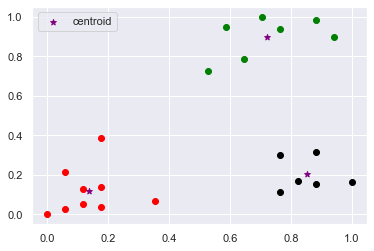

In [80]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend();

# Elbow plot

In [ ]:
# This is used slect the k value clearly that is the number clusters that needs to be taken into consideration

In [ ]:
# SSE--> Sum of Squared Error ['']
# interia gives the sum of squared erros and we are appending into the SSE=[] list and we plot it against various k values

In [96]:
OMP_NUM_THREADS=1

In [97]:
SSE=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    SSE.append(km.inertia_)
    

F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [98]:
SSE

[5.434011511988167,
 2.091136388699075,
 0.4750783498553077,
 0.34910470944195515,
 0.2621792762345199,
 0.22020960864009337,
 0.16858512236029657,
 0.1393785249550778,
 0.11107177965486882]

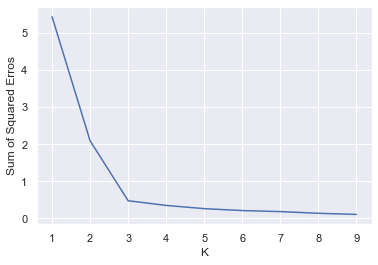

In [92]:
sns.lineplot(x=range(1,10),y=SSE)
plt.xlabel('K')
plt.ylabel('Sum of Squared Erros');

In [ ]:
# We should K value as 3 as it can be seen clearly as elbow point 
# As the k value increases the SSE decreases and taking such high value of k will result in overfitting of the model